In [1]:
from crear_dataset import *
from funcions_net import *
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
import pandas as pd
from preprocessing import *
from func_sel import *
import pyreadstat
import pandas as pd
from crear_dataset import *


In [2]:

df_orig, meta = pyreadstat.read_sav("CEJFEAjut2015Updated.sav")

df_variables = pd.read_csv("variables.csv", sep=';')

dict = create_dict(meta)

print("Creem diccionari")

Creem diccionari


In [3]:

df = create_dataset_2(df_orig, dict)
df = origen(df,df_orig)

Hola


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Delictes molt violents'] = 0
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[dict[num]] = np.where(df[dict[num]] == 5, 1, 0)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\crear_dataset.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [4]:
print("Mirem quants nans tenim a cada columna")
netejat,df = neteja_na_columns(df, llindar=0.6)

df = omple_nans(df)

print("Columnes netejades")
## fem label encoding de les columnes categòriques
df = label_encoding(df)

df['temps_fins_reincidencia1a'] = df['temps_fins_reincidencia1a'].apply(lambda x: 1095 if x > 1095 else x)

Mirem quants nans tenim a cada columna
Columnes netejades


c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:73: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_net[col].fillna(mitjana, inplace=True)
c:\Users\jjf20\OneDrive\Documents\Universitat\TFG\preprocessing.py:79: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [5]:
num_columnes = df.shape[1]
print("Hem netejat les columnes i hem fet label encoding")
print("Tenim ", num_columnes, " columnes")

Hem netejat les columnes i hem fet label encoding
Tenim  89  columnes


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='temps_fins_reincidencia1a'), df['temps_fins_reincidencia1a'], test_size=0.2,random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

## normalitzem les dades
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


In [8]:
import pandas as pd

if isinstance(X_train, pd.DataFrame):
    print("La variable és un DataFrame")
else:
    print("La variable no és un DataFrame")


La variable no és un DataFrame


In [9]:
from ctgan import CTGAN
import pandas as pd
# Suposem un dataset real en 'df'
# Suposant que X_train és un DataFrame i y_train és una sèrie

X_train = pd.DataFrame(X_train, columns=df.drop(columns='temps_fins_reincidencia1a').columns)
y_train = pd.Series(y_train)
df_train = X_train.copy()
df_train['temps_fins_reincidencia1a'] = y_train  # Afegim la variable objectiu al dataset


print("Entrenem el model")
model = CTGAN(
    epochs=300,  
    batch_size=20,  
    generator_dim=(256, 256),  
    discriminator_dim=(256, 256),  
    embedding_dim=128,  
    verbose=True  # Activa els logs d'entrenament
)

model.fit(df_train)  # Entrenar amb les dades originals
synthetic_data = model.sample(1000)  # Generar 1000 registres sintètics

X_synthetic = synthetic_data.drop(columns='temps_fins_reincidencia1a')
y_synthetic = synthetic_data['temps_fins_reincidencia1a']



Entrenem el model


InvalidDataError: CTGAN does not support null values in the continuous training data. Please remove all null values from your continuous training data.

In [ ]:
X_train_filtrat, coef_significatius = filter_significant_features(X_synthetic,y_synthetic, df, llindar=0.1,alpha=1, print_results=True)

Hem fet el model Lasso
Hem trobat  16  coeficients nuls
Hem trobat  72  coeficients no nuls
Els coeficients no nuls són:
EdatAD                        1.593878
Niv_Esc                       7.992598
NSancGreu                    -1.737776
NSancMGreu                   -4.451558
Total_Del                     4.462105
                               ...    
Centre_Sud_America           -4.501824
Nord_America                 45.853639
Pare_Catala_Fora_Espanya    -13.690048
Pares_No_Catalans_Espanya    -0.304987
Pares_Fora_Espanya           -1.078165
Length: 72, dtype: float64
Els coeficients nuls són:
NSancLleu                       0.0
Pri_Exp                         0.0
YPI_CU                          0.0
ICUJ_PT                        -0.0
Delictes molt violents          0.0
Ant_Jo                          0.0
Ant_Fa                          0.0
Delictes_molt_violents         -0.0
Magrebins                       0.0
Asiatics                       -0.0
Resta_Europa                    0.0
A

In [ ]:
print("Les columnes més significatives són: ")
print(df.columns[coef_significatius.argsort()[::-1][0:20]])

Les columnes més significatives són: 
Index(['Gitanos', 'Delictes molt violents', 'VASTTotal', 'ICUT_PT', 'YPI_UN',
       'YPI_RE', 'YPI_DC', 'Pri_Exp', 'ICUJ_CA', 'YSRTotProb', 'SD3Narc',
       'YPI_GR', 'TRFMGrupExtCAPEe', 'ICUJ_UE', 'Niv_Esc', 'YPI_LY',
       'CAPEe_PT_3items', 'NSancMGreu', 'YPI_TS', 'Total_Del'],
      dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [20,50,100],
    'max_depth': [300,400,500],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_synthetic)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu

best_model = grid_search.best_estimator_


Millor paràmetre: {'max_depth': 300, 'n_estimators': 100}
Millor precisió: 31365.387536511204
Mitjana dels resultats de test per cada combinació:
32369.692573503642


In [ ]:
# Obtenim la importància de cada característica
coef_importants = best_model.feature_importances_

# Obtenim els noms de les característiques (suposant que tenim un DataFrame 'df')
feature_names = X_train_filtrat.columns  

# Ordenem les característiques segons la seva importància (de major a menor)
indices_ordenats = coef_importants.argsort()[::-1][0:20]

# Mostrem els noms de les 20 característiques més importants amb la seva importància
print("Les 20 característiques més importants són:")
for i in indices_ordenats:
    print(f"{feature_names[i]}: {coef_importants[i]:.4f}")



Les 20 característiques més importants són:
YSRGrupDSMCDConsCAPEe: 0.0615
Subsaharians: 0.0514
YPI_TS: 0.0335
YSRGrupExtCAPEe: 0.0311
CAPEe_PT_3items: 0.0291
YPI_MA: 0.0285
SD3Narc: 0.0277
YPI_GM: 0.0239
ICUJ_UE: 0.0230
TriPMTotal: 0.0225
YPI_CA: 0.0198
YSRTotProb: 0.0174
VASTTotal: 0.0164
SAVRYInd: 0.0160
Llatins: 0.0154
Niv_Esc: 0.0151
Nord_America: 0.0150
TRFMGrupDSMCDConsCAPEe: 0.0150
PCLe_PT: 0.0144
TriPMBold: 0.0142



--- AVALUACIÓ FINAL EN TEST ---
MSE (Test): 117121.6418


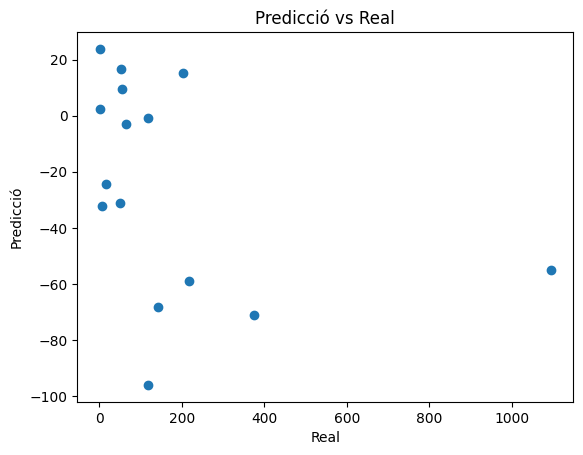

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = scaler.transform(X_test)
X_test_filtrat = pd.DataFrame(X_test, columns=df.drop(columns='temps_fins_reincidencia1a').columns)[coef_significatius.index]


y_test_pred = best_model.predict(X_test_filtrat)

# Calculem la mètrica MSE i R²
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n--- AVALUACIÓ FINAL EN TEST ---")
print(f"MSE (Test): {test_mse:.4f}")


## plot de les prediccions
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real')
plt.ylabel('Predicció')
plt.title('Predicció vs Real')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

## fem grid search per trobar els millors hiperparàmetres

param_grid = {
    'n_estimators': [20,50,100],
    'max_depth': [300,400,500],
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(
    rf, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

# Mostrem la mitjana dels resultats de test
print("Mitjana dels resultats de test per cada combinació:")
print(np.mean(grid_search.cv_results_['mean_test_score'] * -1))  # Multipliquem per -1 per obtenir el MSE positiu

best_model = grid_search.best_estimator_


Millor paràmetre: {'max_depth': 500, 'n_estimators': 20}
Millor precisió: 79618.21185833334
Mitjana dels resultats de test per cada combinació:
87848.07648025926



--- AVALUACIÓ FINAL EN TEST ---
MSE (Test): 36069.9170


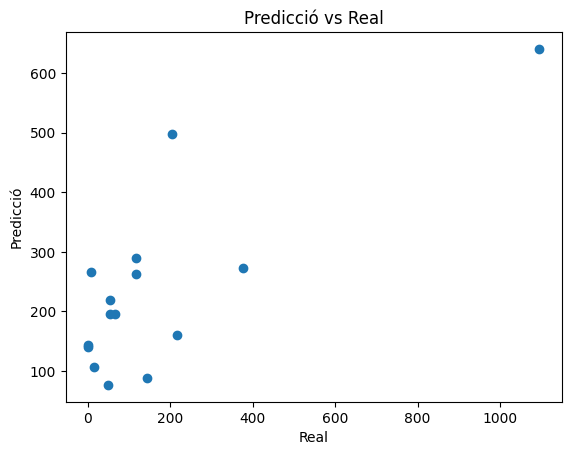

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = scaler.transform(X_test)
X_test_filtrat = pd.DataFrame(X_test, columns=df.drop(columns='temps_fins_reincidencia1a').columns)[coef_significatius.index]


y_test_pred = best_model.predict(X_test_filtrat)

# Calculem la mètrica MSE i R²
test_mse = mean_squared_error(y_test, y_test_pred)

print("\n--- AVALUACIÓ FINAL EN TEST ---")
print(f"MSE (Test): {test_mse:.4f}")


## plot de les prediccions
plt.scatter(y_test, y_test_pred)
plt.xlabel('Real')
plt.ylabel('Predicció')
plt.title('Predicció vs Real')
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Definim la graella d'hiperparàmetres
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(
    xgb, 
    param_grid, 
    cv=10, 
    scoring='neg_mean_squared_error', 
    return_train_score=True
)

# Realitzem el Grid Search
grid_search.fit(X_train_filtrat, y_train)

# Resultats
print("Millor paràmetre:", grid_search.best_params_)
print("Millor precisió:", -grid_search.best_score_)  # Negatiu perquè s'ha usat neg_mean_squared_error

#


^C
